In [1]:
from IPython.display import display,HTML
display(HTML("<style>.container {width:95% !important ; }</style>"))

# packages

In [1]:
from matplotlib import font_manager
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor



# font_manager.get_font_names() 전체 폰트이름 확인
# 맥의 경우 AppleGothic
# 고딕이나 나눔 관련한 폰트 입력하면됨
plt.rc('font',family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False # 음수

# ADP 27회 실기 문제

# 문제설명 (1번)
- 데이터 url :https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/rauds.csv    
- 출처 :https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud (후처리)    
신용카드 사용에 대한 데이터이다. 각 컬럼의 의미는 다음과 같다.    
Time : 카드 이용 시점의 시각 (sec)    
V1 ~ V25 : 유저 특성에 관한 피쳐 (float)    
Amount : 거래금액    
Class : 0: 정상거래 , 1: 이상거래

## 문제 1-1 
EDA 데이터 탐색 (시각화 포함)

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/rauds.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,23.0,1.173285,0.353498,0.283905,1.133563,-0.172577,-0.916054,0.369025,-0.327260,-0.246651,...,0.067003,0.227812,-0.150487,0.435045,0.724825,-0.337082,0.016368,0.030041,41.88,0
1,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
2,36.0,1.095525,-0.116085,1.397912,1.497547,-1.049124,0.072839,-0.723802,0.287532,0.996327,...,-0.033234,0.093262,0.089498,0.361261,0.250963,-0.378280,0.081024,0.034227,2.09,0
3,39.0,-1.330882,0.267540,-0.168470,-0.701232,3.281972,3.216390,-0.059394,0.895430,-0.017779,...,-0.151042,-0.311726,-0.374793,1.014886,0.353992,-0.510327,0.159033,0.228708,13.84,0
4,42.0,-0.249361,0.399227,0.068009,-1.060619,2.410399,3.736574,0.316446,0.672296,0.015140,...,-0.257663,-0.616762,-0.156669,1.031135,0.120617,0.310494,-0.288299,-0.223964,32.51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5895,53918.0,0.403219,-2.217606,0.896060,0.085715,-2.070879,0.005367,-0.556992,0.009619,-0.041436,...,0.340094,0.206330,-0.295668,0.686480,0.095281,-0.297105,-0.009134,0.105823,453.88,0
5896,53921.0,-0.522059,1.137416,1.259800,0.062588,0.091055,-1.001577,0.711566,-0.128925,-0.374525,...,-0.247823,-0.654365,0.056804,0.341667,-0.143083,0.060813,0.121968,0.089060,2.99,0
5897,53923.0,1.240521,-0.407404,0.799860,-0.017190,-0.836946,0.017304,-0.679900,0.087057,1.138758,...,-0.161425,-0.305266,-0.060383,-0.377075,0.218993,1.040339,-0.038218,0.011145,27.00,0
5898,53935.0,-1.392871,0.074602,1.824792,-0.906820,-1.260230,-0.397788,0.361187,0.469641,0.111782,...,0.179609,0.068224,0.295973,0.442538,-0.103168,0.831455,-0.164239,0.015218,182.63,0


In [4]:
df.info()
print("결측값이 없음을 확인할 수 있고 모든 컬럼이 수치형 변수로 이루어짐을 알 수 있다.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900 entries, 0 to 5899
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5900 non-null   float64
 1   V1      5900 non-null   float64
 2   V2      5900 non-null   float64
 3   V3      5900 non-null   float64
 4   V4      5900 non-null   float64
 5   V5      5900 non-null   float64
 6   V6      5900 non-null   float64
 7   V7      5900 non-null   float64
 8   V8      5900 non-null   float64
 9   V9      5900 non-null   float64
 10  V10     5900 non-null   float64
 11  V11     5900 non-null   float64
 12  V12     5900 non-null   float64
 13  V13     5900 non-null   float64
 14  V14     5900 non-null   float64
 15  V15     5900 non-null   float64
 16  V16     5900 non-null   float64
 17  V17     5900 non-null   float64
 18  V18     5900 non-null   float64
 19  V19     5900 non-null   float64
 20  V20     5900 non-null   float64
 21  V21     5900 non-null   float64
 22  

In [5]:
print('수치형 변수들의 n-percentile 및 최대/최소값을 확인하였다.')
df.describe()

수치형 변수들의 n-percentile 및 최대/최소값을 확인하여 본다.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,...,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000
mean,34843.708644,-0.403448,0.116005,0.418754,0.302098,-0.397897,0.015096,-0.299454,0.142078,-0.066877,...,-0.011297,-0.116133,-0.047313,0.001418,0.136734,0.033682,0.019165,0.005559,97.435436,0.030000
std,14439.632538,2.461703,1.958243,2.519640,1.673844,1.855859,1.330093,2.002929,1.522908,1.307326,...,0.727395,0.636932,0.758799,0.591048,0.471545,0.502810,0.404419,0.308767,273.674664,0.170602
min,23.000000,-30.552380,-38.305310,-31.103685,-4.434211,-22.105532,-17.574835,-21.922811,-25.399133,-9.283925,...,-13.977283,-5.619439,-25.356744,-2.721546,-6.035054,-1.338556,-6.126486,-8.424041,0.000000,0.000000
25%,28757.250000,-1.055510,-0.558766,0.137922,-0.695648,-0.930389,-0.675800,-0.621884,-0.135614,-0.691489,...,-0.225493,-0.530802,-0.182136,-0.320867,-0.133045,-0.325799,-0.060991,-0.005390,6.850000,0.000000
50%,38004.000000,-0.272564,0.102035,0.726057,0.238589,-0.325063,-0.174479,-0.088259,0.072420,-0.096082,...,-0.058451,-0.091832,-0.053651,0.062366,0.166192,-0.062885,0.010544,0.023643,25.990000,0.000000
75%,45616.750000,1.145628,0.782316,1.382378,1.107154,0.263630,0.465859,0.411312,0.358367,0.630021,...,0.125615,0.307648,0.077943,0.398618,0.426102,0.327371,0.089431,0.080838,89.990000,0.000000
max,53937.000000,1.628532,16.713389,4.226108,11.927512,23.046242,7.885721,14.785051,20.007208,6.956877,...,11.851446,4.393846,13.876221,3.679740,5.525093,3.463246,5.794075,4.957651,11898.090000,1.000000


class에 따른 데이터 불균형 확인


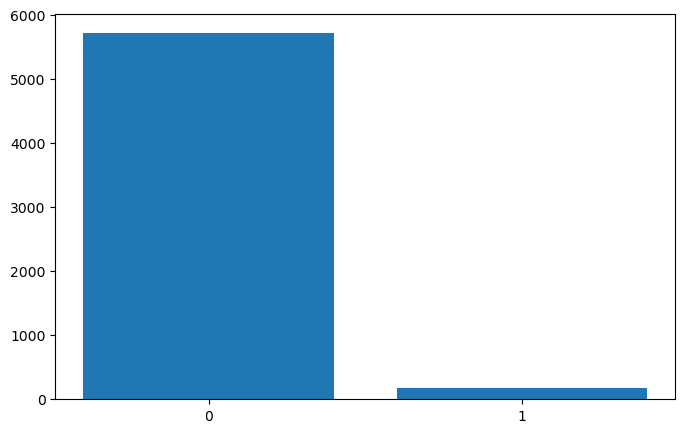

Class 데이터 불균형
Class : 0	 0.97
Class : 1	 0.03


In [7]:
print('class에 따른 데이터 불균형 확인')
import matplotlib.pyplot as plt

df['Class'] = df['Class'].astype('str')

plt.figure(figsize = (8, 5))
plt.bar(df['Class'].value_counts().index, df['Class'].value_counts().values)
plt.show()

print('Class 데이터 불균형')
print('Class : 0\t', len(df[df['Class'] == '0']) / len(df))
print('Class : 1\t', len(df[df['Class'] == '1']) / len(df))

df['Class'] = df['Class'].astype('int')

## 문제 1-2 
변수간 상관관계를 시각화하고 전처리가 필요하다면 그 이유를 설명하고 시행하라

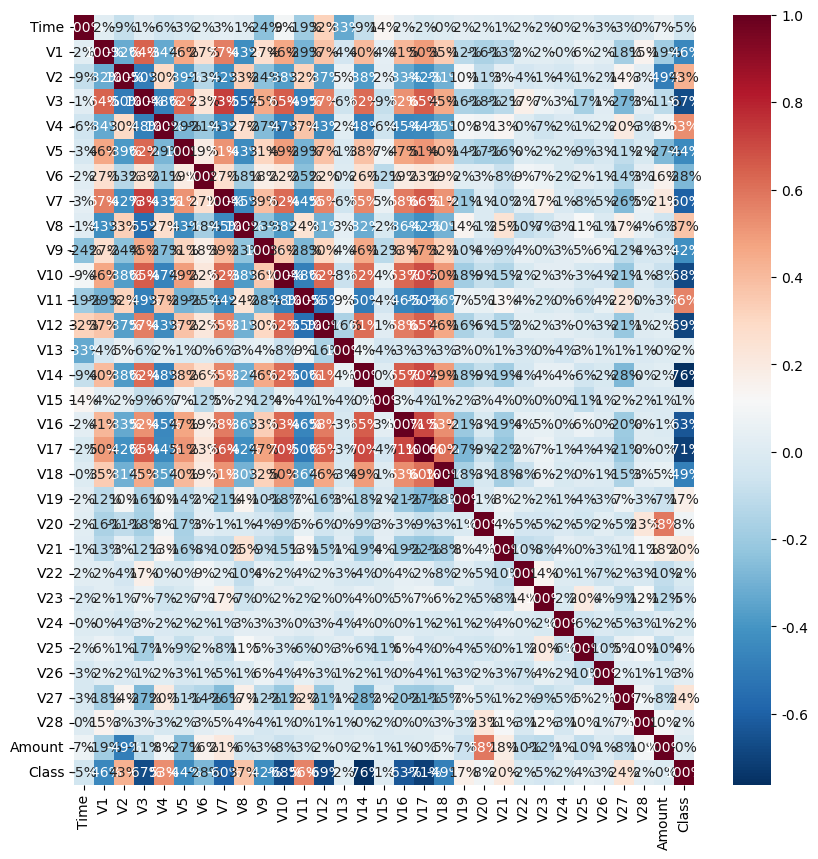

상관계수가 0.9 이상인 것은 v16, v17이므로 다중공선성이 발생할 수 있다.
또한, 나머지 변수들 간에도 높은 상관관계를 가지고 있는 변수들이 있으므로 전처리가 필요하다.


In [9]:
import seaborn as sns

df_corr = df.corr(method = 'pearson')
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, xticklabels=df.columns, yticklabels=df.columns, cmap='RdBu_r', annot=True, fmt='.0%')
plt.show()

print('상관계수가 0.9 이상인 것은 v16, v17이므로 다중공선성이 발생할 수 있다.')
print('또한, 나머지 변수들 간에도 높은 상관관계를 가지고 있는 변수들이 있으므로 전처리가 필요하다.')

## 문제 2.1 
차원축소 방법 2가지 이상에 대해 설명하고 장단점을 비교하라

In [13]:
print("""
차원 축소에는 주성분 분석(PCA)과 선형 판별 분석법(LDA)이 있다.
PCA
PCA는 가장 대표적인 차원 축소 기법으로, 여러 변수 간 존재하는 상관관계를 이용하여 이를 대표하는 주성분을 추출해 차원을 축소하는 기법이다.
또한, PCA의 핵심은 데이터를 축에 사영했을 때, 가장 높은 분산을 가지는 데이터의 축을 찾아 그 축으로 차원을 축소하는 것인데, 이 축을 주성분이라고 한다.
이때, 높은 분산을 갖는 축을 찾는 이유는 정보의 손실을 최소화하기 위함이다.
사영했을 때, 분산이 크다는 것은 원래 데이터의 분포를 잘 설명할 수 있다는 것을 뜻한다. 즉, 정보의 손실을 최소화할 수 있다는 것을 뜻한다.
유의해야 할 점은 데이터의 스케일에 따라 설명가능한 분산량이 달라질 수 있기 때문에 데이터 스케일링을 꼭 사전에 해주어야 한다.
LDA
LDA는 PCA와 매우 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만, 중요한 차이는 LDA는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다.
즉, PCA는 입력 데이터의 변동성(분산)이 가장 큰 축을 찾지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.
다시 말해, LDA는 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산을 최대화하고, 클래스 내부 분산은 최대한 작게 가져가는 방식이다.
이때, 유의해야 할 점은 LDA는 PCA와 다르게 지도학습이기 때문에 클래스의 target 값을 변환 시 넣어줘야 한다.""")


차원 축소에는 주성분 분석(PCA)과 선형 판별 분석법(LDA)이 있다.
PCA
PCA는 가장 대표적인 차원 축소 기법으로, 여러 변수 간 존재하는 상관관계를 이용하여 이를 대표하는 주성분을 추출해 차원을 축소하는 기법이다.
또한, PCA의 핵심은 데이터를 축에 사영했을 때, 가장 높은 분산을 가지는 데이터의 축을 찾아 그 축으로 차원을 축소하는 것인데, 이 축을 주성분이라고 한다.
이때, 높은 분산을 갖는 축을 찾는 이유는 정보의 손실을 최소화하기 위함이다.
사영했을 때, 분산이 크다는 것은 원래 데이터의 분포를 잘 설명할 수 있다는 것을 뜻한다. 즉, 정보의 손실을 최소화할 수 있다는 것을 뜻한다.
유의해야 할 점은 데이터의 스케일에 따라 설명가능한 분산량이 달라질 수 있기 때문에 데이터 스케일링을 꼭 사전에 해주어야 한다.
LDA
LDA는 PCA와 매우 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만, 중요한 차이는 LDA는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다.
즉, PCA는 입력 데이터의 변동성(분산)이 가장 큰 축을 찾지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.
다시 말해, LDA는 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산을 최대화하고, 클래스 내부 분산은 최대한 작게 가져가는 방식이다.
이때, 유의해야 할 점은 LDA는 PCA와 다르게 지도학습이기 때문에 클래스의 target 값을 변환 시 넣어줘야 한다.


## 문제 2.2
2.1에서 선택한 한가지 차원축소 방법을 실제로 수행하고 선택한 이유를 설명하라

In [14]:
print('여기서 나는 PCA를 선정한다. 그 이유는 현재 다중공선성이 의심되는 변수(v16, v17)이 있고, 이외에도 상관관계가 있는 변수들이 존재하기 때문이다.')
x = df[df.columns.difference(['Class'])]
y = df['Class']

# StandardScaling 진행
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()

x_scaled = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

pca = PCA(n_components = 10, random_state = 731)
pca.fit(x_scaled)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[:7].sum())
# 기존 19개의 설명변수에서 7주성분까지 사용하면, 전체 데이터의 83.6%를 설명할 수 있음을 알 수 있다.

result_pca = PCA(n_components = 7, random_state = 731)
x_scaled_pca = pd.DataFrame(result_pca.fit_transform(x_scaled), columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7'])
x_scaled_pca

여기서 나는 PCA를 선정한다. 그 이유는 현재 다중공선성이 의심되는 변수(v16, v17)이 있고, 이외에도 상관관계가 있는 변수들이 존재하기 때문이다.
[0.2606016  0.06817507 0.05385215 0.04665323 0.04303629 0.04001403
 0.03742619 0.03559163 0.03492963 0.03408742]
0.5497585506510408


,p1,p2,p3,p4,p5,p6,p7
0,-0.321164,-0.769680,1.532051,-0.332364,0.474177,-0.341715,-0.177727
1,-0.360739,-0.934688,1.420620,-0.190624,-0.103880,0.592221,-0.321986
2,-0.402864,-0.760791,0.778354,-0.165649,0.064937,0.071603,-0.264162
3,-0.857242,-0.603129,1.381394,-0.525945,0.495007,1.013557,-1.355839
4,-0.927367,-0.510856,1.451933,0.427061,0.011241,1.683207,-1.010836
...,...,...,...,...,...,...,...
5895,-0.070713,2.163237,-0.463082,-0.174664,-0.542227,1.109360,-0.645371
5896,-0.332544,-0.070805,-1.164733,0.498808,0.355742,-0.920723,0.136944
5897,-0.714490,0.011514,-0.693939,-0.172908,0.119248,-0.094245,0.063181
5898,-0.534850,0.805261,-0.656759,0.001798,-0.044427,0.236287,0.572809


## 문제 3.1
오버샘플링과 언더샘플링에 대한 설명 및 장단점을 설명하라

In [15]:
'''
오버샘플링
장점: 정보 손실 없음, 대부분의 경우 언더샘플링에 비해 높은 분류 정확도를 보임
단점: 과적합 가능성, 계산 시간이 증가, 노이즈 또는 이상치에 민감

언더샘플링
장점: 다수 범주 관측치 제거로 계산시간 감소, 데이터 클렌징으로 클래스 오버랩 감소 가능
단점: 데이터 제거로 인한 정보 손실 발생
'''

'\n오버샘플링\n장점: 정보 손실 없음, 대부분의 경우 언더샘플링에 비해 높은 분류 정확도를 보임\n단점: 과적합 가능성, 계산 시간이 증가, 노이즈 또는 이상치에 민감\n\n언더샘플링\n장점: 다수 범주 관측치 제거로 계산시간 감소, 데이터 클렌징으로 클래스 오버랩 감소 가능\n단점: 데이터 제거로 인한 정보 손실 발생\n'

## 문제 3.2 
오버샘플링 및 언더샘플링 방식 중 하나를 선택하여 구현하고 Class를 종속변수로 하는 분류 모델을 2가지 이상 구현하고 성능을 비교하라

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_clf = RandomForestClassifier(n_estimators = 300, max_depth = 10, criterion = 'entropy')

# train, test 분리
from sklearn.model_selection import train_test_split

# ros
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros, y_ros, test_size = 0.3, stratify = y_ros, random_state = 731)

# smt
x_train_smt, x_test_smt, y_train_smt, y_test_smt = train_test_split(x_smt, y_smt, test_size = 0.3, stratify = y_smt, random_state = 731)

import time

# 1. ros
ros_start_time = time.time()
rf_clf.fit(x_train_ros, y_train_ros)
ros_end_time = time.time()
ros_pred = rf_clf.predict(x_test_ros)

print('Accuracy : ', rf_clf.score(x_test_ros, y_test_ros))
print('time : ', ros_end_time - ros_start_time, 'seconds')

# 2. smt
smt_start_time = time.time()
rf_clf.fit(x_train_smt, y_train_smt)
smt_end_time = time.time()
smt_pred = rf_clf.predict(x_test_smt)

print('Accuracy : ', rf_clf.score(x_test_smt, y_test_smt))
print('time : ', smt_end_time - smt_start_time, 'seconds')

print('랜덤 오버샘플링의 경우 더 성능이 좋으므로 랜덤오브샘플링을 사용한다.')

Accuracy :  0.9988351776354106
time :  2.2270348072052 seconds
Accuracy :  0.9778683750728014
time :  3.2339999675750732 seconds
랜덤 오버샘플링의 경우 더 성능이 좋으므로 랜덤오브샘플링을 사용한다.


## 문제 4.1 
Class 컬럼이 주어지지 않았다고 가정하고 비지도 학습 방식의 이상탐지 모델을 만들려고한다.     
이상 탐지 모델 2가지 이상 기술하고 장단점을 설명하라

## 문제 4.2 
2번에서 만든 데이터로 한 가지 비지도학습 이상탐지 모델을 구현하고, 3번에서 만든 모델과 결과를 비교하라

## 문제 5
2년 전 제품 생산량이 100,000개, 1년 전 제품 생산량이 150,000개, 그 후 팩토리 기술의 상승으로 제품 생산량이 250,000개 되었을 때, 연평균 복합성장률 대푯값을 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

In [20]:
import numpy as np

a1=100000
a2=150000
a3=250000

r1 = a2/a1
r2 = a3/a2
geo_mean = np.sqrt(r1*r2) - 1
print('연평균 상승률 : ', round(geo_mean*100, 2), '%')

연평균 상승률 :  58.11 %


## 문제 6
12건의 광고 시간 측정. 평균 15.5초, 분산 3.2초 일때 90% 신뢰구간은?

In [21]:
import numpy as np
from scipy import stats

n = 12 # 표본 개수
dof = 11  # 자유도
m = 15.5 # 평균
var = 3.2 # 분산
std = np.sqrt(var) # 표준편차

print(stats.t.interval(alpha = 0.9, df = dof, loc = m, scale = std))

(12.287423572494966, 18.71257642750503)


C:\Users\235ju\AppData\Local\Temp\ipykernel_5160\1831786579.py:10: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print(stats.t.interval(alpha = 0.9, df = dof, loc = m, scale = std))


## 문제 설명 (7번)
강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 검정하시오. (단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있다.)

- 데이터 url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/river.csv

## 문제 7.1
귀무가설과 대립가설을 세우시오

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/river.csv')
df

,River,up,down
0,A,57.1,45.7
1,B,51.6,37.2
2,C,53.9,53.3
3,D,59.0,54.3
4,E,57.5,46.3
5,F,46.1,61.3
6,G,53.8,42.7
7,H,49.4,50.2
8,I,49.6,49.1
9,J,51.6,57.7


## 문제 7.2
검정통계량 및 유의확률을 구하고 검정 결과를 서술하시오

In [26]:
print('''
귀무가설 : 강의 상류와 하류의 생물 다양성 점수에 차이가 없다.
대립가설 : 강의 상류와 하류의 생물 다양성 점수에 차이가 있다.
''')

import pandas as pd
river = ['A', 'B', 'C', 'D', 'E']
up = [57.1, 51.6, 53.9, 59.0, 57.5]
down = [45.7, 37.2, 53.3, 54.3, 46.3]
df = pd.DataFrame({'river': river,
                   'up' : up,
                   'down' : down})


import scipy.stats as stats
from scipy.stats import shapiro


print('1 - (1). before에 대한 샤피로 검정(정규성 검정)')
print('첫번째값(검정통계치) : ', shapiro(df['up'])[0])
print('두 번째값(p-value) : ', shapiro(df['up'])[1])
print('1 - (2). after에 대한 샤피로 검정(정규성 검정)')
print('첫번째값(검정통계치) : ', shapiro(df['down'])[0])
print('두 번째값(p-value) : ', shapiro(df['down'])[1])
print('\n=====\n')

# p-value가 유의수준보다 크므로 귀무가설을 채택한다.
# 즉, before와 after 두 데이터는 모두 정규성을 갖는다.
# 이에 따라 ttest 진행
print('2. t-검정')
print('첫번째값(검정통계치) : ', stats.ttest_rel(df['up'], df['down'], alternative = 'greater')[0])
print('두 번째값(p-value) : ', stats.ttest_rel(df['up'], df['down'], alternative = 'greater')[1])

# p-value가 유의수준보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 즉, '강의 상류와 하류의 생물 다양성 점수에 차이는 통계적으로 유의하다.'고 해석할 수 있다.
# 또한, alternative를 greater로 설정했기 때문에 'up이 down보다 크다. 즉, 강의 상류의 생물 다양성 점수는 하류의 생물 다양성 점수보다 크다.'는 결론을 낼 수 있다.


귀무가설 : 강의 상류와 하류의 생물 다양성 점수에 차이가 없다.
대립가설 : 강의 상류와 하류의 생물 다양성 점수에 차이가 있다.

1 - (1). before에 대한 샤피로 검정(정규성 검정)
첫번째값(검정통계치) :  0.9285789132118225
두 번째값(p-value) :  0.5867120623588562
1 - (2). after에 대한 샤피로 검정(정규성 검정)
첫번째값(검정통계치) :  0.9143499135971069
두 번째값(p-value) :  0.49416664242744446

=====

2. t-검정
첫번째값(검정통계치) :  3.3526056764717995
두 번째값(p-value) :  0.014249888617026644


## 문제설명(8번)
user_counts를 종속변수로 하는 데이터이다

- 데이터 url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem8.csv

## 문제 8.1
분위수 회귀분석 (Quantile Regression) 을 사용하여 회귀 계수를 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

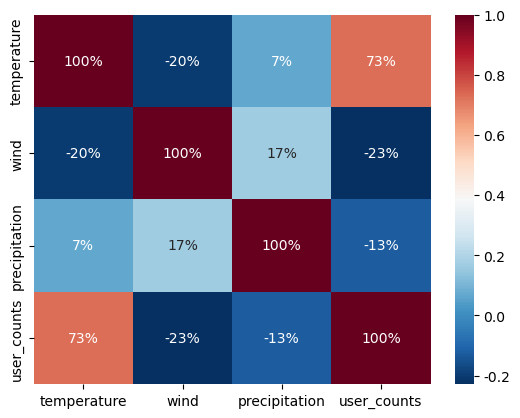

In [28]:
# df 불러오기
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem8.csv')
df.head()

import seaborn as sns
import matplotlib.pyplot as plt


# 히트맵
df_corr = df.corr(method = 'pearson')
sns.heatmap(df_corr, annot = True, xticklabels=df.columns, yticklabels=df.columns, cmap='RdBu_r', fmt='.0%')
plt.show()


In [29]:
import statsmodels.formula.api as smf
print(df.head(3))

for q in [0.5] :
    formula = 'user_counts ~ temperature + wind + precipitation'
    model = smf.quantreg(formula, df)
    result = model.fit(q=q) 
    print('quantile = ', q )
    print(result.summary())

    names = result.params[1:].index
    values = result.params[1:].values
    
    for name, val in zip(names, values) :
        print(name, ':', round(val, 2))

   temperature   wind  precipitation  user_counts
0    10.400000  4.600       0.844944         6368
1     5.666667  4.625       0.040860         5902
2     4.933333  4.725       0.008696         6226
quantile =  0.5
                         QuantReg Regression Results                          
Dep. Variable:            user_counts   Pseudo R-squared:               0.3723
Model:                       QuantReg   Bandwidth:                       840.9
Method:                 Least Squares   Sparsity:                        5590.
Date:                Thu, 26 Oct 2023   No. Observations:                 2097
Time:                        16:53:46   Df Residuals:                     2093
                                        Df Model:                            3
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5941.8395    198.127     29.990      0.000    5553.2

## 문제 8.2
8.1의 모델의 회귀계수를 활용하여 temperature : 10.5 , wind : 8.2 , precipitation : 3.5 일때 user_counts를 예측하시오 

In [30]:

df_sample = pd.DataFrame(data={'temperature':[10.5], 'wind': [8.2], 'precipitation': [3.5]})
y_predict = result.predict(df_sample)
print('user_counts:', (y_predict.values[0]).astype('int'))

user_counts: 7412


## 문제설명(9번)
지하철 호선과 월별, 승객 수 간 상관관계가 있는지 확인(Type III Anova 사용)

- 데이터 url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/subway.csv

## 문제 9.1 
귀무가설과 대립가설 설정하라

In [31]:
# df 불러오기
df_subway = pd.read_csv('https://github.com/johyunkang/adp_certificate/files/10883822/subway.csv')
print(df_subway.head())

print('귀무가설: 지하철 호선, 월별, 승객수간에는 상관관계가 없다.')
print('대립가설: 지하철 호선과 월별, 승객 수 간에는 상관관계가 있다.')

   line  month  total
0     1      1   1310
1     1      2   1300
2     1      3   1305
3     1      4   1200
4     1      5   1301
귀무가설: 지하철 호선, 월별, 승객수간에는 상관관계가 없다.
대립가설: 지하철 호선과 월별, 승객 수 간에는 상관관계가 있다.


## 문제 9.2
통계량을 구하고 검정 결과를 서술하라

In [33]:
# type 3 ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
# the following model statement will be used for Type I, Type II, and Type III ANOVA
model = ols('total ~ line * month', data=df_subway).fit()
print(model.summary())

# setting typ as Type I ANOVA in Python
aov_table = sm.stats.anova_lm(model, typ=3)
print(aov_table)
print('p-value가 모두 유의수준 0.05보다 크므로 귀무가설을 채택한다. 즉, 모든 변수 간에 상관관계가 없다.')

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.1437
Date:                Thu, 26 Oct 2023   Prob (F-statistic):              0.933
Time:                        16:56:02   Log-Likelihood:                -475.01
No. Observations:                  72   AIC:                             958.0
Df Residuals:                      68   BIC:                             967.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1379.3788    121.348     11.367      0.0

참고사이트 
- https://blog.naver.com/clairefromkorea/222938928665
- https://amaruak00.github.io/2022/12/17/adp27th.html
- https://blog.naver.com/dmz04/222938757841